In [1]:
"""Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

ModuleNotFoundError: No module named 'src'

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
x_flat = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x_peaks = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])

## Implementations

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3150.555288721226
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 343.27637564228326
1 [0. 1. 0. 0. 0. 0. 0. 0.] -165.9310628598446
2 [0. 0. 1. 0. 0. 0. 0. 0.] 23.406485970264825
3 [0. 0. 0. 1. 0. 0. 0. 0.] 229.32364031348843
4 [0. 0. 0. 0. 1. 0. 0. 0.] -83.22925193767243
5 [0. 0. 0. 0. 0. 1. 0. 0.] -92.01871291816452
6 [0. 0. 0. 0. 0. 0. 1. 0.] 221.67538513205076
7 [0. 0. 0. 0. 0. 0. 0. 1.] 244.97902242898223
8 [1. 0. 0. 0. 0. 0. 0. 0.] 460.64270273791556
9 [0. 1. 0. 0. 0. 0. 0. 0.] 8.457208616104243
10 [0. 0. 1. 0. 0. 0. 0. 0.] 0.8729174674918211
11 [0. 0. 0. 1. 0. 0. 0. 0.] 23.053236624327173
12 [0. 0. 0. 0. 1. 0. 0. 0.] -347.91067538274
13 [0. 0. 0. 0. 0. 1. 0. 0.] 48.370732605053604
14 [0. 0. 0. 0. 0. 0. 1. 0.] 5.260849071974302
15 [0. 0. 0. 0. 0. 0. 0. 1.] 401.68245427560277
16 [1. 0. 0. 0. 0. 0. 0. 0.] 79.38077725707616
17 [0. 1. 0. 0. 0. 0. 0. 0.] -198.98227870064306
18 [0. 0. 1. 0. 0. 0. 0. 0.

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

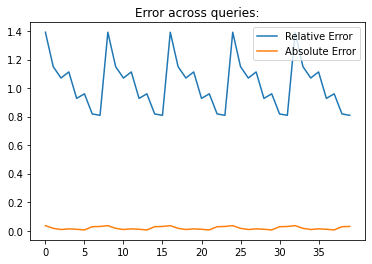

In [4]:
pmw(W_five_identity, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2249.1248382364483
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 91.0877583299486
1 [0. 1. 0. 0. 0. 0. 0. 0.] -57.65067952923096
2 [0. 0. 1. 0. 0. 0. 0. 0.] -64.28874180215155
3 [0. 0. 0. 1. 0. 0. 0. 0.] 286.32864152571216
4 [0. 0. 0. 0. 1. 0. 0. 0.] 148.6532319303865
5 [0. 0. 0. 0. 0. 1. 0. 0.] 212.27851945987126
6 [0. 0. 0. 0. 0. 0. 1. 0.] 55.34128398374344
7 [0. 0. 0. 0. 0. 0. 0. 1.] -449.45325046515165
8 [1. 0. 0. 0. 0. 0. 0. 0.] 51.34702733219837
9 [0. 1. 0. 0. 0. 0. 0. 0.] 49.82138283030357
10 [0. 0. 1. 0. 0. 0. 0. 0.] -14.85662016369166
11 [0. 0. 0. 1. 0. 0. 0. 0.] -49.23054889709131
12 [0. 0. 0. 0. 1. 0. 0. 0.] 83.21098314140208
13 [0. 0. 0. 0. 0. 1. 0. 0.] 31.0607285702763
14 [0. 0. 0. 0. 0. 0. 1. 0.] -85.1792994964706
15 [0. 0. 0. 0. 0. 0. 0. 1.] 32.823812294816435
16 [1. 0. 0. 0. 0. 0. 0. 0.] 146.16666687107931
17 [0. 1. 0. 0. 0. 0. 0. 0.] -108.69585839146283
18 [0. 0. 1. 0. 0. 0. 0. 0.] -

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

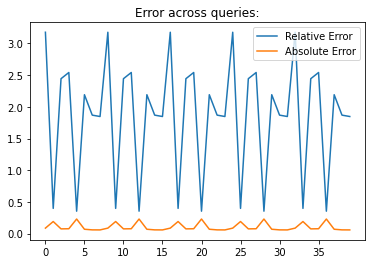

In [5]:
pmw(W_five_identity, x_peaks)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3200.67325048008
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 4.083846303914256
1 [0. 1. 0. 0. 0. 0. 0. 0.] -312.7903522276601
2 [0. 0. 1. 0. 0. 0. 0. 0.] -109.12627388548394
3 [0. 0. 0. 1. 0. 0. 0. 0.] 16.715908067416418
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.0874426394946474
5 [0. 0. 0. 0. 0. 1. 0. 0.] 367.85567164747636
6 [0. 0. 0. 0. 0. 0. 1. 0.] -456.926663820555
7 [0. 0. 0. 0. 0. 0. 0. 1.] -12.035037606111525
8 [1. 0. 0. 0. 0. 0. 0. 0.] -101.57006073587763
9 [1. 1. 0. 0. 0. 0. 0. 0.] 274.26385414585354
10 [1. 1. 1. 0. 0. 0. 0. 0.] -80.0337008208503
11 [1. 1. 1. 1. 0. 0. 0. 0.] -21.771170507945417
12 [1. 1. 1. 1. 1. 0. 0. 0.] -312.0912770959033
13 [1. 1. 1. 1. 1. 1. 0. 0.] 283.074839328828
14 [1. 1. 1. 1. 1. 1. 1. 0.] -72.85261904825282
15 [1. 1. 1. 1. 1. 1. 1. 1.] 50.76376898584895
16 [0. 1. 0. 0. 0. 0. 0. 0.] 84.86927434379295
17 [0. 1. 1. 0. 0. 0. 0. 0.] 14.520211941726545
18 [0. 1. 1. 1. 0. 0. 0. 0.

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.125,
 0.25,
 0.375,
 0.5,
 0.125,
 0.25,
 0.375,
 0.125,
 0.25,
 0.125]

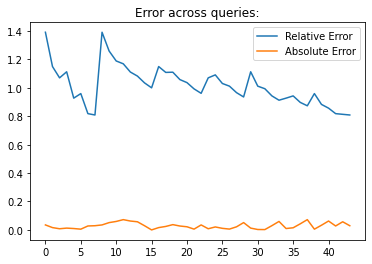

In [6]:
pmw(W_sd, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2284.9031510428154
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 73.86642564186593
1 [0. 1. 0. 0. 0. 0. 0. 0.] 29.738749571985572
2 [0. 0. 1. 0. 0. 0. 0. 0.] -250.77941149718072
3 [0. 0. 0. 1. 0. 0. 0. 0.] 37.405524468386034
4 [0. 0. 0. 0. 1. 0. 0. 0.] -47.571792667598395
5 [0. 0. 0. 0. 0. 1. 0. 0.] -66.43877826704968
6 [0. 0. 0. 0. 0. 0. 1. 0.] 51.539251058668235
7 [0. 0. 0. 0. 0. 0. 0. 1.] -435.0930045292874
8 [1. 0. 0. 0. 0. 0. 0. 0.] -44.98676966624651
9 [1. 1. 0. 0. 0. 0. 0. 0.] -20.526232500084934
10 [1. 1. 1. 0. 0. 0. 0. 0.] -36.99370190502605
11 [1. 1. 1. 1. 0. 0. 0. 0.] 43.612446491886985
12 [1. 1. 1. 1. 1. 0. 0. 0.] -1.102768874299675
13 [1. 1. 1. 1. 1. 1. 0. 0.] 55.10601732518413
14 [1. 1. 1. 1. 1. 1. 1. 0.] 26.938627226260962
15 [1. 1. 1. 1. 1. 1. 1. 1.] -2.970312804406553
16 [0. 1. 0. 0. 0. 0. 0. 0.] -99.29542638885664
17 [0. 1. 1. 0. 0. 0. 0. 0.] 59.65238434789193
18 [0. 1. 1. 1. 0. 0. 

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.125,
 0.25,
 0.375,
 0.5,
 0.125,
 0.25,
 0.375,
 0.125,
 0.25,
 0.125]

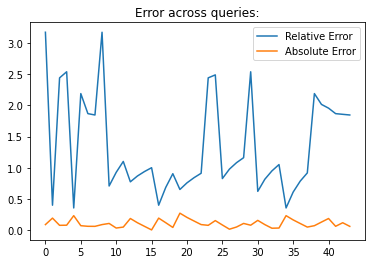

In [7]:
pmw(W_sd, x_peaks)

So far, it is clear that the algorithm updates more when 
- answering dense (all-range) than sparse (identity) workloads,
- flat than uneven dataframes.

The next question we need to think about is what to initialize the threshold and level of laplace noise to add. 

7/16 Questions - what do we initialize laplace_scale and threshold to be? How do I use epsilon and beta for this new instance? Do we want to be changing the d_t_hat threshold or the threshold for the max amount of updates - let's start playing with the query threshold because d_t_hat threshold honestly seems pretty reasonable.

# optimized

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.07719847738312727
1 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01872226565444772
2 [0. 0. 1. 0. 0. 0. 0. 0.] 0.0037107884901651234
3 [0. 0. 0. 1. 0. 0. 0. 0.] -0.02442723824486573
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.0023739169486601264
5 [0. 0. 0. 0. 0. 1. 0. 0.] 0.018526121444630644
6 [0. 0. 0. 0. 0. 0. 1. 0.] 0.015659227924190222
7 [0. 0. 0. 0. 0. 0. 0. 1.] 0.03676835282301849
8 [1. 0. 0. 0. 0. 0. 0. 0.] -0.0507726971494919
9 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01400286853520144
10 [0. 0. 1. 0. 0. 0. 0. 0.] 0.011593583468188895
11 [0. 0. 0. 1. 0. 0. 0. 0.] 0.0023702893644300116
12 [0. 0. 0. 0. 1. 0. 0. 0.] 0.007419342165080917
13 [0. 0. 0. 0. 0. 1. 0. 0.] -0.001974701337158241
14 [0. 0. 0. 0. 0. 0. 1. 0.] 0.040967618125565375
15 [0. 0. 0. 0. 0. 0. 0. 1.] 0.029499280677900863
16 [1. 0. 0. 0. 0. 0. 0. 0.] -0.03611004433935873
17 [0. 1. 0. 0. 0. 0. 0. 0.] -0.0227091049139557

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

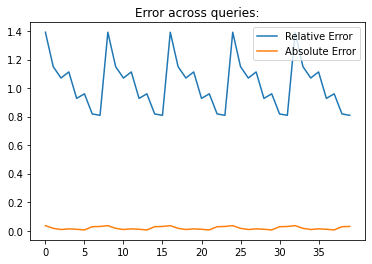

In [8]:
pmw_optimized(W_five_identity, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 0.05
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.01885065148878612
1 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01681431935327249
2 [0. 0. 1. 0. 0. 0. 0. 0.] -0.011079198029369075
3 [0. 0. 0. 1. 0. 0. 0. 0.] -0.026043059654641848
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.019801860557978196
5 [0. 0. 0. 0. 0. 1. 0. 0.] 0.023088687415236314
6 [0. 0. 0. 0. 0. 0. 1. 0.] -0.008087931517315683
7 [0. 0. 0. 0. 0. 0. 0. 1.] 0.0316093131311459
8 [1. 0. 0. 0. 0. 0. 0. 0.] -0.03092159806207756
9 [1. 1. 0. 0. 0. 0. 0. 0.] -0.06717735987825516
10 [1. 1. 1. 0. 0. 0. 0. 0.] -0.05260332137252821
11 [1. 1. 1. 1. 0. 0. 0. 0.] -0.07491106731493391
12 [1. 1. 1. 1. 1. 0. 0. 0.] -0.058709658120829844
13 [1. 1. 1. 1. 1. 1. 0. 0.] -0.07292519936932995
14 [1. 1. 1. 1. 1. 1. 1. 0.] -0.03569604890764588
15 [1. 1. 1. 1. 1. 1. 1. 1.] -0.006831619644566023
16 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01641787597599008
17 [0. 1. 1. 0. 0. 0. 0. 0.] -0.043677318018036

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 1.642611321848561e-05,
 2.9126707663390434e-05,
 3.8513659658026955e-05,
 5.131180806640694e-05,
 6.128015393980972e-05,
 0.8785364182721261,
 1.0,
 0.12857689980492804,
 0.2556985660399797,
 0.3813814690411649,
 0.5056418927332025,
 0.6284959367393241,
 0.7499595184671981,
 0.8714231001950721,
 0.12712166623505167,
 0.25280456923623684,
 0.3770649929282745,
 0.4999190369343961,
 0.6213826186622701,
 7.299098165124555e-05,
 0.1253140055236822,
 0.24920970692049238,
 0.37170315655894187,
 0.49281022512680817,
 6.295327195144459e-05,
 0.12335052820689363,
 0.24530497492651393,
 3.915853564175488e-05,
 5.1149703957181475e-05,
 0.12036499116425226,
 0.23936769115453904,
 3.931981219102379e-05,
 0.11813681597298241,
 2.8307589212235753e-05,
 0.11845539602659032]

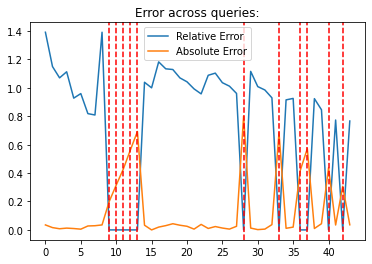

In [111]:
pmw_optimized(W_sd, 
              x=np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720]), 
              laplace_scale=0.01, 
              threshold=.05)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 0.05
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.04394334154217516
1 [1. 1. 0. 0. 0. 0. 0. 0.] -0.04990884904052442
2 [1. 1. 1. 0. 0. 0. 0. 0.] -0.058713040561957086
3 [1. 1. 1. 1. 0. 0. 0. 0.] -0.07807745791403176
4 [1. 1. 1. 1. 1. 0. 0. 0.] -0.03888924150849782
5 [1. 1. 1. 1. 1. 1. 0. 0.] -0.05341345207471182
6 [1. 1. 1. 1. 1. 1. 1. 0.] -0.024590207889108595
7 [1. 1. 1. 1. 1. 1. 1. 1.] 0.009674975102259786
8 [0. 1. 0. 0. 0. 0. 0. 0.] -0.014732211730996675
9 [0. 1. 1. 0. 0. 0. 0. 0.] -0.027742840586860412
10 [0. 1. 1. 1. 0. 0. 0. 0.] -0.04188692525193782
11 [0. 1. 1. 1. 1. 0. 0. 0.] -0.03132126313031203
12 [0. 1. 1. 1. 1. 1. 0. 0.] -0.033693362193172094
13 [0. 1. 1. 1. 1. 1. 1. 0.] 0.002393976959928934
14 [0. 1. 1. 1. 1. 1. 1. 1.] 0.03230328075569355
15 [0. 0. 1. 0. 0. 0. 0. 0.] -0.0059048404646872
16 [0. 0. 1. 1. 0. 0. 0. 0.] -0.01686194077720038
17 [0. 0. 1. 1. 1. 0. 0. 0.] -0.022773535100180

[0.125,
 0.25,
 2.8417516571252732e-05,
 3.810060967953421e-05,
 0.6287370445974105,
 6.281023459031702e-05,
 0.8773026205603459,
 1.0,
 0.1269595595588697,
 0.2539191191177394,
 0.3794417501663784,
 0.5035437158641003,
 0.6276456815618222,
 0.7503430610014763,
 0.8730404404411303,
 0.1269595595588697,
 0.25248219060750865,
 0.37658415630523057,
 0.5006861220029525,
 0.6233835014426066,
 0.7460808808822605,
 0.12552263104863892,
 0.24962459674636084,
 0.37372656244408275,
 0.49642394188373684,
 6.0508372699782526e-05,
 0.12356321358716428,
 0.24712642717432856,
 0.3692911521007252,
 5.1327339075106404e-05,
 0.12284804240211332,
 0.24430569045214331,
 4.045978952827781e-05,
 0.1205821653897127,
 2.772358367631534e-05,
 0.11954371059286448,
 0.12945843278967653,
 0.12945843278967653,
 0.12945843278967653,
 0.1265445945241771,
 0.12369634065711758,
 0.12229634526394663,
 0.11954371059286448,
 0.11954371059286448]

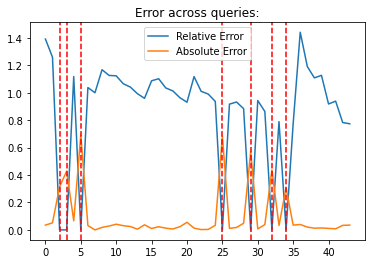

In [123]:
pmw_optimized(W_ds, 
              x=np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720]), 
              laplace_scale=0.01, 
              threshold=.05)

8/11: 

1. how can you tell how much total privacy budget is being used? Because PMW doesn't use privacy budget the same way as the bucket filling method
- any time it gives you information about the dataset itself, it uses some amount of budget. You can either submit an answer from the synthetic database. 
- keep track of how many times it updates
- even if we set the thresholds to certain times, outputting times has to be computed normally. number of updates/

2. Can we think through a specific, ideal scenario that can help me pin down what threshold numbers are best? 
- if we give 2 analysts independent scenarios of query ans, and they ans it independently, is there a way to combine it and it gets a lot worse? 
- is there a setting where one analyst can reorganize their queries to make others get significantly worse error
- start with small examples without permutations. 
- 2 analysts with 2 queries each. 
- look at metrics such as total error, take average of 100 experiments. any individual run won't give you much insight, several runs will. 
- expected error is tough here bc order in which you answer them can affect the expected error
- in a setting that small, no expectations to see any error, suggest playing w 2 queries. if you can't get the effect, try to make adverserial cases. Then, consider why this isn't happening? Maybe we need more complex scenarios

3. What type of larger scale experiments can I run/visualizations can I make to reveal trends of when the dataset updates? 
